## **Project Name**
Employment Trend for Fresh University Graduates Post Covid-**19**

# **Authors**: 
         GOH Yong Yu
         LEE Hong Wei
         LEONG Priscilla 
         TAY Leonard Jia Hao

## **I. Problem Statement**
With more than 15000 local university students graduating annually, we would like to explore salary and employment trend especially post Covid-19 as Singapore reinvents her economy. The data includes the newer universities such as SUTD and SUSS but excludes all other private universities. 

Through data exploration we would like to find out the following


>1: Employment rate of all local universities over the past years.

> 2: Which university is the most highly sought after by employers.







## **II. Dataset and Data Preparation**
The Graduate Employment Survey (GES) is jointly conducted by NTU, NUS, SMU, SIT (from 2013), SUTD (from 2015) and SUSS (from 2018) annually to survey the employment conditions of graduates about six months after their final examinations.

URL of dataset: https://data.gov.sg/dataset/graduate-employment-survey-ntu-nus-sit-smu-suss-sutd

Name of data portal : Data.gov.sg, Govtech SG

This CSV dataset regarding graduates employment, which we found from the gov.sg, has a large enough sample **size** to be statistically useful. The survey data ranges from 2013 to 2018 and provide quartile salary ranges, median salary and employment rate from the course work.

The 2019 datasets were from the Ministry of Manpower Data on starting salaries of the graduating cohorts from the local publicly-funded institutions of higher learning facilitate the comparison of starting salaries across various courses from the universities

https://stats.mom.gov.sg/Pages/Graduate-Starting-Salary-Tables2019.aspx

The three datasets were in excel format;
Employment and Gross Monthly Starting Salary of University Graduates from NUS, NTU, SMU and SUSS in Full-Time Permanent Employment by Degree, 2019, 
Employment and Gross Monthly Starting Salary of University Graduates from SUTD in Full-Time Permanent Employment by Degree, 2019 and 
Employment and Gross Monthly Starting Salary of University Graduates from SIT in Full-Time Permanent Employment by Degree, 2019 


## **III. Methodology**




Before any data analysis can be performed, we first read all the source files into pandas dataframe. Then we called up the first five rows of the dataframes to view the column names and understand if the data was categorial or numerical. We proceeded to check the shape of the dataframes, datatypes of the columns in the dataframes, number of null value rows to get a better picture of the volume of data we were dealing with and what data needed cleaning, if any.

We have a total of four datasets from four different sources; 2013 - 2018 data from all six local universities, i.e., NUS, NTU, SMU, SUSS, SUTD and SIT and three 2019 data; from NUS, NTU, SMU and SUSS, from SUTD and from SIT.  

Upon checking the datatype of the columns in the 2013 - 2018 dataset, it was found that all of the numerical data was in object format. Hence, we had to convert it into float64 in order to carry out aggregation of the data. Some preliminary analysis was performed for this dataset as it had more columns.

The data in the remaining three 2019 datasets had only four columns which were similar to the main 2013 - 2018 dataset (12 columns) but column names had to be renamed to be exactly the same as the former since we wanted to eventually create a single dataframe which would contain data from years 2013 - 2019. These three datasets were first concatenated to form a single 2019 dataframe before we created a new column 'year' so that the overall 2019 dataframe columns would match those in the 2013 - 2018 one. 

All rows with null values in both 2013 - 2018 and 2019 dataframes were dropped separately before they were concatenated into one single dataframe as we did not want to lose information in the main dataframe.

Two graphs were plotted; Permanent Employment Rate of Permanent against year and Median Gross Monthly Salary against Year.** 

# **IV. Insights / Evaluation**

Through data exploration we have found out that SMU graduates are highly sought after. With an overall employment rate of more than 94% and the highest gross median salary. The median salary of fresh graduates from local universities have been steadily increasing over the years. In 2019, employment rate has fallen compared to the previous years.

In future, a comparison can be made between the local and private universities to compare the differences in salary and employment rate

# **Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# **Dataset**


In [ ]:
df = pd.read_csv('graduate-employment-survey-ntu-nus-sit-smu-suss-sutd.csv', encoding='latin1', engine = 'python')
df.head()

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
0,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701,3200,3727,3350,2900,4000
1,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),97.1,95.7,2850,2700,2938,2700,2700,2900
2,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),90.9,85.7,3053,3000,3214,3000,2700,3500
3,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,87.5,87.5,3557,3400,3615,3400,3000,4100
4,2013,Nanyang Technological University,College of Engineering,Aerospace Engineering,95.3,95.3,3494,3500,3536,3500,3100,3816


In [ ]:
display(df.dtypes)
print('Number of rows and columns', df.shape)

year                          int64
university                   object
school                       object
degree                       object
employment_rate_overall      object
employment_rate_ft_perm      object
basic_monthly_mean           object
basic_monthly_median         object
gross_monthly_mean           object
gross_monthly_median         object
gross_mthly_25_percentile    object
gross_mthly_75_percentile    object
dtype: object

Number of rows and columns (703, 12)


# **Converting Data Types for futher analysis**

In [ ]:
columns_to_select = ['employment_rate_overall', 'employment_rate_ft_perm', 'gross_monthly_median',\
                     'gross_mthly_25_percentile', 'gross_mthly_75_percentile', 'basic_monthly_mean',\
                     'basic_monthly_median', 'gross_monthly_mean']
df[columns_to_select] = df[columns_to_select].apply(pd.to_numeric, errors='coerce', axis=1)
df.dtypes

year                           int64
university                    object
school                        object
degree                        object
employment_rate_overall      float64
employment_rate_ft_perm      float64
basic_monthly_mean           float64
basic_monthly_median         float64
gross_monthly_mean           float64
gross_monthly_median         float64
gross_mthly_25_percentile    float64
gross_mthly_75_percentile    float64
dtype: object

In [ ]:
df.isnull().sum()

year                          0
university                    0
school                        0
degree                        0
employment_rate_overall      73
employment_rate_ft_perm      73
basic_monthly_mean           73
basic_monthly_median         73
gross_monthly_mean           73
gross_monthly_median         73
gross_mthly_25_percentile    73
gross_mthly_75_percentile    73
dtype: int64

In [ ]:
columns_to_select = ['employment_rate_overall', 'employment_rate_ft_perm', 'gross_monthly_median']
overall_df = df[columns_to_select]
overall_df.describe(include='all')

,employment_rate_overall,employment_rate_ft_perm,gross_monthly_median
count,630.000000,630.000000,630.000000
mean,90.544921,82.673968,3380.304762
std,6.911726,13.405332,507.325954
min,66.700000,14.300000,1800.000000
25%,86.025000,74.750000,3085.750000
50%,91.300000,85.600000,3300.000000
75%,96.200000,93.075000,3533.250000
max,100.000000,100.000000,5800.000000


From this we are able to see the descriptive statistics for all of the fresh graduates surveyed. Overall 90.5% of the fresh graduates are able to find employment within 6 months after graduation with 82.6% being employed as a permanent employee. The median gross salary across all schools and courses is $3380

# Statistics & Observations

In [ ]:
#Keeping only the rows that contail non-null values in a new temporary dataframe called 'null_removed_df'

null_removed_df = df.dropna()
null_removed_df.shape
#null_removed_df.isnull().sum()

(630, 12)

In [ ]:
#Statistics for each university's employment rate
null_removed_groupby_university = null_removed_df.groupby(['university'])
null_removed_groupby_university['employment_rate_overall'].describe(include='all')

,count,mean,std,min,25%,50%,75%,max
university,,,,,,,,
Nanyang Technological University,204.0,87.832353,7.484140,66.7,82.025,88.00,93.225,100.0
National University of Singapore,207.0,91.043961,6.419278,71.9,87.150,91.70,96.450,100.0
Singapore Institute of Technology,135.0,91.680000,6.663442,72.2,86.850,92.30,97.000,100.0
Singapore Management University,72.0,94.480556,3.731353,84.2,92.200,94.85,97.425,100.0
Singapore University of Social Sciences,3.0,93.566667,5.363146,88.0,91.000,94.00,96.350,98.7
Singapore University of Technology and Design,9.0,91.033333,6.346653,80.3,87.000,91.70,92.500,100.0


Comparing the statistics from each university, we can easily observe that Singapore Management University has the highest average employment rate across all it's faculties.


In [ ]:
#Statistics for each university's gross monthly mean salary
null_removed_groupby_university['gross_monthly_mean'].describe(include='all')

,count,mean,std,min,25%,50%,75%,max
university,,,,,,,,
Nanyang Technological University,204.0,3393.813725,347.356895,2577.0,3171.25,3370.5,3577.00,5225.0
National University of Singapore,207.0,3586.536232,540.795896,2100.0,3281.50,3435.0,3819.50,5263.0
Singapore Institute of Technology,135.0,3264.407407,384.181943,2344.0,2962.50,3301.0,3485.00,4131.0
Singapore Management University,72.0,4097.069444,624.894297,3150.0,3610.00,3944.5,4455.25,5617.0
Singapore University of Social Sciences,3.0,3098.333333,265.151529,2879.0,2951.00,3023.0,3208.00,3393.0
Singapore University of Technology and Design,9.0,3866.777778,231.946534,3565.0,3690.00,3830.0,3956.00,4232.0


Comparing the statistics from each university, we can easily observe that on average, Singapore Management University graduates receive the highest salary across all it's faculties.

# Merging 2019 data into DataFrame

In [ ]:
import numpy as np
import pandas as pd
result_2019 = pd.read_excel('EMPT_011_Monthly_Gross_Starting_Salary_of_Graduates.xls', skiprows = 1, header = 1)
result_2019.head()

,Course Duration,Course Cluster,Degree,Abbreviation,Universities conducting the courses,Employment Rate (%),Median Monthly Gross Starting Salary ($)
0,4-year,"ARTS, DESIGN & MEDIA",Bachelor of Arts (Honours),B.A.(H),NUS,68.2,3500.0
1,NaN,NaN,Bachelor of Communication Studies (Honours),B.Comm.Studies (H),NTU,69.4,3200.0
2,NaN,NaN,"Bachelor of Fine Arts (Arts, Design & Media)",B.F.A.,NTU,50.9,3000.0
3,NaN,BUILT ENVIRONMENT,Bachelor of Science (Project & Facilities Mana...,B.Sc.(Proj & FM),NUS,80.6,3155.0
4,NaN,NaN,Bachelor of Science (Real Estate),B.Sc.(RE),NUS,89.6,3400.0


In [ ]:
relevant_2019 = result_2019[['Degree', 'Universities conducting the courses', 'Employment Rate (%)', 'Median Monthly Gross Starting Salary ($)']].copy()
relevant_2019.head()

,Degree,Universities conducting the courses,Employment Rate (%),Median Monthly Gross Starting Salary ($)
0,Bachelor of Arts (Honours),NUS,68.2,3500.0
1,Bachelor of Communication Studies (Honours),NTU,69.4,3200.0
2,"Bachelor of Fine Arts (Arts, Design & Media)",NTU,50.9,3000.0
3,Bachelor of Science (Project & Facilities Mana...,NUS,80.6,3155.0
4,Bachelor of Science (Real Estate),NUS,89.6,3400.0


In [ ]:
relevant_2019.shape

(68, 4)

In [ ]:
relevant_2019.isnull().sum()

Degree                                      2
Universities conducting the courses         2
Employment Rate (%)                         2
Median Monthly Gross Starting Salary ($)    2
dtype: int64

In [ ]:
df_null = relevant_2019[relevant_2019.isna().any(axis=1)]
print (df_null)

   Degree  ... Median Monthly Gross Starting Salary ($)
66    NaN  ...                                      NaN
67    NaN  ...                                      NaN

[2 rows x 4 columns]


In [ ]:
relevant_df = relevant_2019.dropna()
relevant_df.shape

(66, 4)

In [ ]:
relevant_df.rename(columns = {'Universities conducting the courses':'university', 'Degree':'degree', 
                              'Employment Rate (%)':'employment_rate_overall', 'Median Monthly Gross Starting Salary ($)': 'gross_monthly_median'}, inplace = True) 
relevant_df.columns

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['degree', 'university', 'employment_rate_overall',
       'gross_monthly_median'],
      dtype='object')

In [ ]:
relevant_df['university'].unique()

array(['NUS', 'NTU', 'SUSS', 'SMU'], dtype=object)

In [ ]:
def uni_name(university):
    if university == 'NUS':
        return 'National University of Singapore'
    elif university =='NTU':
        return 'Nanyang Technological University'
    elif university == 'SMU':
        return 'Singapore Management University'
    else :
        return 'Singapore University of Social Sciences'
    
relevant_df['university'] = relevant_df['university'].apply(uni_name)
relevant_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,degree,university,employment_rate_overall,gross_monthly_median
0,Bachelor of Arts (Honours),National University of Singapore,68.2,3500.0
1,Bachelor of Communication Studies (Honours),Nanyang Technological University,69.4,3200.0
2,"Bachelor of Fine Arts (Arts, Design & Media)",Nanyang Technological University,50.9,3000.0
3,Bachelor of Science (Project & Facilities Mana...,National University of Singapore,80.6,3155.0
4,Bachelor of Science (Real Estate),National University of Singapore,89.6,3400.0


In [ ]:
sutd_2019 = pd.read_excel('SUTD 2019 Graduate Employment Rate & Starting Salary.xlsx', header = 3)
sutd_2019.head()

,University,Degree,Full-Time Permanent Employment (%),Median Gross Monthly Starting Salary ($)
0,NaN,NaN,NaN,NaN
1,Singapore University of Technology and Design,Bachelor of Engineering (Engineering Product D...,80.2,4000.0
2,Singapore University of Technology and Design,Bachelor of Engineering (Engineering Systems a...,87.3,4000.0
3,Singapore University of Technology and Design,Bachelor of Engineering (Information Systems T...,85.7,4400.0


In [ ]:
sutd_2019.rename(columns = {'Degree':'degree','University':'university','Full-Time Permanent Employment (%)':'employment_rate_overall', 'Median Gross Monthly Starting Salary ($)': 'gross_monthly_median'}, inplace = True) 
sutd_2019.columns

Index(['university', 'degree', 'employment_rate_overall',
       'gross_monthly_median'],
      dtype='object')

In [ ]:
sutd_2019.shape

(4, 4)

In [ ]:
sit_2019 = pd.read_excel('SIT 2019 Graduate Employment Rate & Starting Salary.xlsx', header = 3)
sit_2019.head()

,University,Degree,Full-Time Permanent Employment (%),Median Gross Monthly Starting Salary ($)
0,NaN,NaN,NaN,NaN
1,Singapore Institute of Technology,DigiPen Institute of Technology,NaN,NaN
2,Singapore Institute of Technology,Bachelor of Science in Computer Science in Rea...,96.8,s
3,Singapore Institute of Technology,The Glasgow School of Art,NaN,NaN
4,Singapore Institute of Technology,Bachelor of Arts with Honours in Interior Design,76.9,2775


In [ ]:
sit_2019.rename(columns = {'Degree':'degree','University':'university',  
                              'Full-Time Permanent Employment (%)':'employment_rate_overall', 'Median Gross Monthly Starting Salary ($)': 'gross_monthly_median'}, inplace = True) 
sit_2019.columns

Index(['university', 'degree', 'employment_rate_overall',
       'gross_monthly_median'],
      dtype='object')

In [ ]:
sit_2019.shape

(30, 4)

In [ ]:
all_uni_2019 = pd.concat([relevant_df, sutd_2019, sit_2019], axis = 0, sort=False)
all_uni_2019.head()

,degree,university,employment_rate_overall,gross_monthly_median
0,Bachelor of Arts (Honours),National University of Singapore,68.2,3500
1,Bachelor of Communication Studies (Honours),Nanyang Technological University,69.4,3200
2,"Bachelor of Fine Arts (Arts, Design & Media)",Nanyang Technological University,50.9,3000
3,Bachelor of Science (Project & Facilities Mana...,National University of Singapore,80.6,3155
4,Bachelor of Science (Real Estate),National University of Singapore,89.6,3400


In [ ]:
all_uni_2019.shape

(100, 4)

In [ ]:
all_uni_2019.isnull().sum()

degree                      2
university                  2
employment_rate_overall    12
gross_monthly_median       12
dtype: int64

In [ ]:
df_null = all_uni_2019[all_uni_2019.isna().any(axis=1)]
print (df_null)

                                               degree  ... gross_monthly_median
0                                                 NaN  ...                  NaN
0                                                 NaN  ...                  NaN
1                     DigiPen Institute of Technology  ...                  NaN
3                           The Glasgow School of Art  ...                  NaN
5                                Newcastle University  ...                  NaN
11            Singapore Institute of Technology (SIT)  ...                  NaN
16  SIT-Trinity College Dublin / Trinity College D...  ...                  NaN
18                          SIT-University of Glasgow  ...                  NaN
20                     Technical University of Munich  ...                  NaN
22                              University of Glasgow  ...                  NaN
26                            University of Liverpool  ...                  NaN
28                                   Whe

In [ ]:
final_2019 = all_uni_2019.dropna()
final_2019.shape

(88, 4)

In [ ]:
final_2019['year'] = '2019'
final_2019.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,degree,university,employment_rate_overall,gross_monthly_median,year
0,Bachelor of Arts (Honours),National University of Singapore,68.2,3500,2019
1,Bachelor of Communication Studies (Honours),Nanyang Technological University,69.4,3200,2019
2,"Bachelor of Fine Arts (Arts, Design & Media)",Nanyang Technological University,50.9,3000,2019
3,Bachelor of Science (Project & Facilities Mana...,National University of Singapore,80.6,3155,2019
4,Bachelor of Science (Real Estate),National University of Singapore,89.6,3400,2019


In [ ]:
columns_to_select = ['employment_rate_overall', 'gross_monthly_median']
final_2019[columns_to_select] = final_2019[columns_to_select].apply(pd.to_numeric, errors='coerce', axis=1)
df.dtypes

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


year                           int64
university                    object
school                        object
degree                        object
employment_rate_overall      float64
employment_rate_ft_perm      float64
basic_monthly_mean           float64
basic_monthly_median         float64
gross_monthly_mean           float64
gross_monthly_median         float64
gross_mthly_25_percentile    float64
gross_mthly_75_percentile    float64
dtype: object

In [ ]:
new_df = pd.concat([null_removed_df, final_2019], ignore_index=True)
new_df

,year,university,school,degree,employment_rate_overall,employment_rate_ft_perm,basic_monthly_mean,basic_monthly_median,gross_monthly_mean,gross_monthly_median,gross_mthly_25_percentile,gross_mthly_75_percentile
0,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy and Business,97.4,96.1,3701.0,3200.0,3727.0,3350.0,2900.0,4000.0
1,2013,Nanyang Technological University,College of Business (Nanyang Business School),Accountancy (3-yr direct Honours Programme),97.1,95.7,2850.0,2700.0,2938.0,2700.0,2700.0,2900.0
2,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business (3-yr direct Honours Programme),90.9,85.7,3053.0,3000.0,3214.0,3000.0,2700.0,3500.0
3,2013,Nanyang Technological University,College of Business (Nanyang Business School),Business and Computing,87.5,87.5,3557.0,3400.0,3615.0,3400.0,3000.0,4100.0
4,2013,Nanyang Technological University,College of Engineering,Aerospace Engineering,95.3,95.3,3494.0,3500.0,3536.0,3500.0,3100.0,3816.0
...,...,...,...,...,...,...,...,...,...,...,...,...
713,2019,Singapore Institute of Technology,NaN,Bachelor of Engineering in Mechanical Design E...,90.6,NaN,NaN,NaN,NaN,3500.0,NaN,NaN
714,2019,Singapore Institute of Technology,NaN,Bachelor Of Engineering In Mechatronics (Honours),87.3,NaN,NaN,NaN,NaN,3600.0,NaN,NaN
715,2019,Singapore Institute of Technology,NaN,Bachelor of Science in Computing Science (Hono...,89.3,NaN,NaN,NaN,NaN,4000.0,NaN,NaN
716,2019,Singapore Institute of Technology,NaN,Bachelor of Arts with Honours in Criminology a...,74.2,NaN,NaN,NaN,NaN,3729.0,NaN,NaN


# Employment Rate and Median Salary versus Years

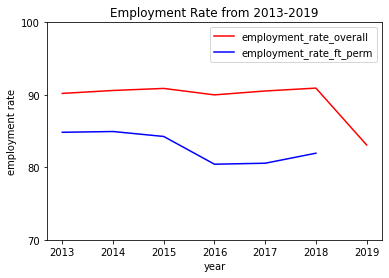

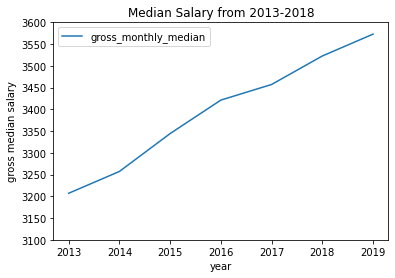

In [ ]:
yeargb = new_df.groupby(new_df['year'])
yeargb.head()
mean = yeargb.mean()
ax = plt.gca()

mean.plot(kind='line',             
          y='employment_rate_overall',
          color='red',
          ax=ax)

mean.plot(kind='line',             
                y='employment_rate_ft_perm',
                color='blue',
                ax=ax)                
              
#plt.xticks(np.arange(10,65,5))
plt.ylabel('employment rate')
plt.yticks(np.arange(70,101,10))
plt.title('Employment Rate from 2013-2019')
plt.show()
mean.plot(kind='line',
          y='gross_monthly_median')

plt.ylabel('gross median salary')
plt.yticks(np.arange(3100,3650,50))
plt.title('Median Salary from 2013-2018')
plt.show()


Over the past couple of years we can see that the gross median salary has been increasing steadily year on year. While in 2019, employment rate dropped. 